In [2]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#convert data file into dataframe
df=pd.read_csv('heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


Observation:
    1.Age:age in years
    2.Sex:1=male,2=female
    3.cp refers to chestpain type, if value is 1- typical angina, value is 2- atypical angina
      value is 3-non-anginal pain, value is 4- asymptomatic
    4.trestbps refers to resting blood pressure( in mm Hg)
    5.chol refers to serum cholestrol in mg/dl
    6.fbs refers to fasting blood sugar
    7.rest ecg refers to ecg results
    8.thalach is the maximum heart rate achieved
    9.exang excercise induced angina
    10.old peak depression induced by excercise
    11.slope-slope of the peak excercise if,value 1-upsloping value 2-flat value 3-down sloping
    12.ca is number of major vessels
    13.num is diagnosis of heart disease if 0-<50% diameter narrowing if 1->50% diameter
       narrowing

In [4]:
df.shape

(200, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exange', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exange      object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exange    200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


Finding: the data does not show any null values because it is represented by
    "?" sign. In order to get the correct null values replace "?" by NaN.

In [8]:
df=df.replace('?',np.NaN)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


Null values are present in most attributes of the data set. null values should be 
modified by using either mean or mode function.Since,categorical data is also present
data type has to be changed before changing the null vales.

### Check null values

In [9]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exange       53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [10]:
df.drop(columns=['ca','thal'],axis=1,inplace=True)

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,oldpeak,slope,num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


### EDA

In [12]:
for i in df:
    print(i,'\n',df[i].unique(),'\n\n')

age 
 [63 44 60 55 66 65 56 59 62 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37] 


sex 
 [1 0] 


cp 
 [4 3 2 1] 


trestbps 
 ['140' '130' '132' '142' '110' '120' '150' '180' '160' '126' nan '128'
 '170' '152' '116' '124' '0' '122' '144' '154' '125' '104' '136' '134'
 '138' '178' '146' '135' '158' '106' '112' '102' '96' '172' '155' '156'
 '118' '100' '190' '114' '127'] 


chol 
 ['260' '209' '218' '228' '213' '0' '236' '267' '166' '220' '177' '186'
 '100' '171' '230' '281' '203' '277' '233' '240' '153' '224' '316' '311'
 '270' '217' '214' '252' '339' '216' '276' '458' '241' '384' '297' '248'
 '308' '208' '227' '210' '245' '225' '198' '195' '161' '258' '235' '305'
 '223' '282' '349' nan '160' '312' '283' '142' '211' '306' '222' '202'
 '197' '204' '274' '192' '298' '272' '200' '261' '181' '221' '175' '219'
 '310' '232' '273' '182' '292' '289' '193' '170' '369' '173' '271' '244'
 '285' '243' '237' '165' '287' '256' '264' '226' '207' '284' '33

In [13]:
#changing data types
df['trestbps']=pd.to_numeric(df['trestbps'],errors='coerce')
df['chol']=pd.to_numeric(df['chol'],errors='coerce')
df['fbs']=pd.to_numeric(df['fbs'],errors='coerce')
df['thalach']=pd.to_numeric(df['thalach'],errors='coerce')
df['exange']=pd.to_numeric(df['exange'],errors='coerce')
df['oldpeak']=pd.to_numeric(df['oldpeak'],errors='coerce')
df['slope']=pd.to_numeric(df['slope'],errors='coerce')

In [14]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exange      float64
oldpeak     float64
slope       float64
num           int64
dtype: object

In [15]:
print(df.trestbps.mean())
print(df.chol.mean())
print(df.fbs.mode())# contains categorical data
print(df.thalach.mean())
print(df.exange.mode()) #contains categorical data
print(df.oldpeak.mean())
print(df.slope.mode())#contains categorical data

133.76388888888889
178.7461139896373
0    0.0
dtype: float64
122.79591836734694
0    1.0
dtype: float64
1.3208333333333333
0    2.0
dtype: float64


In [16]:
#fill the missing values
df['trestbps'].fillna(df['trestbps'].mean(),inplace=True)
df['chol'].fillna(df['chol'].mean(),inplace=True)
df['fbs'].fillna(0,inplace=True)
df['thalach'].fillna(df['thalach'].mean(),inplace=True)
df['exange'].fillna(1,inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)
df['slope'].fillna(2,inplace=True)

In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exange      0
oldpeak     0
slope       0
num         0
dtype: int64

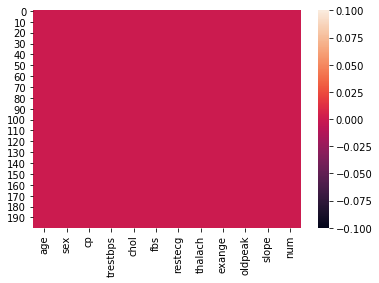

In [18]:
sns.heatmap(df.isnull())

## Statistical Summary

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,oldpeak,slope,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.340000,0.735000,122.795918,0.740000,1.320833,2.065000,1.520000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.474898,0.683455,18.835692,0.439735,0.937755,0.471046,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,0.000000,1.000000,122.795918,1.000000,1.320833,2.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,4.000000


In [20]:
#correlation

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,oldpeak,slope,num
age,1.000000,0.034230,-0.038280,0.181584,0.066972,0.135728,0.002400,-0.149949,0.129027,0.157087,0.107135,0.287289
sex,0.034230,1.000000,0.038036,0.012585,-0.096150,-0.059400,0.060621,-0.001592,0.029402,0.097267,0.086709,0.147470
cp,-0.038280,0.038036,1.000000,0.074638,0.065818,-0.044416,0.034790,-0.123597,0.089904,0.040155,0.059460,0.168210
trestbps,0.181584,0.012585,0.074638,1.000000,0.150192,0.192337,0.092042,-0.013046,0.205900,0.115432,0.083459,0.141719
chol,0.066972,-0.096150,0.065818,0.150192,1.000000,0.173396,0.024257,-0.041209,0.117050,0.002160,0.043363,0.076444
fbs,0.135728,-0.059400,-0.044416,0.192337,0.173396,1.000000,0.170616,0.037972,-0.176144,-0.105363,-0.009435,0.048940
restecg,0.002400,0.060621,0.034790,0.092042,0.024257,0.170616,1.000000,0.012348,-0.063203,-0.106991,-0.039881,-0.032800
thalach,-0.149949,-0.001592,-0.123597,-0.013046,-0.041209,0.037972,0.012348,1.000000,-0.070142,0.172048,-0.107241,-0.079077
exange,0.129027,0.029402,0.089904,0.205900,0.117050,-0.176144,-0.063203,-0.070142,1.000000,0.289320,0.106259,0.206541
oldpeak,0.157087,0.097267,0.040155,0.115432,0.002160,-0.105363,-0.106991,0.172048,0.289320,1.000000,0.292698,0.378209


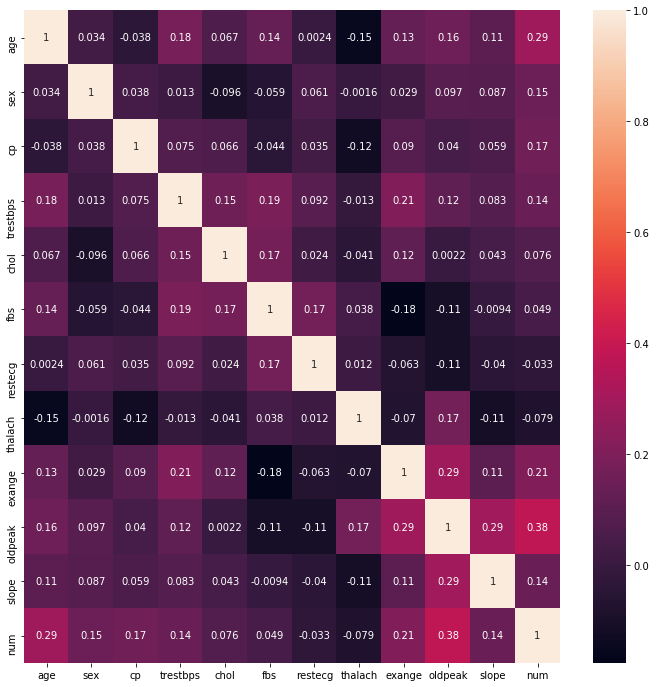

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

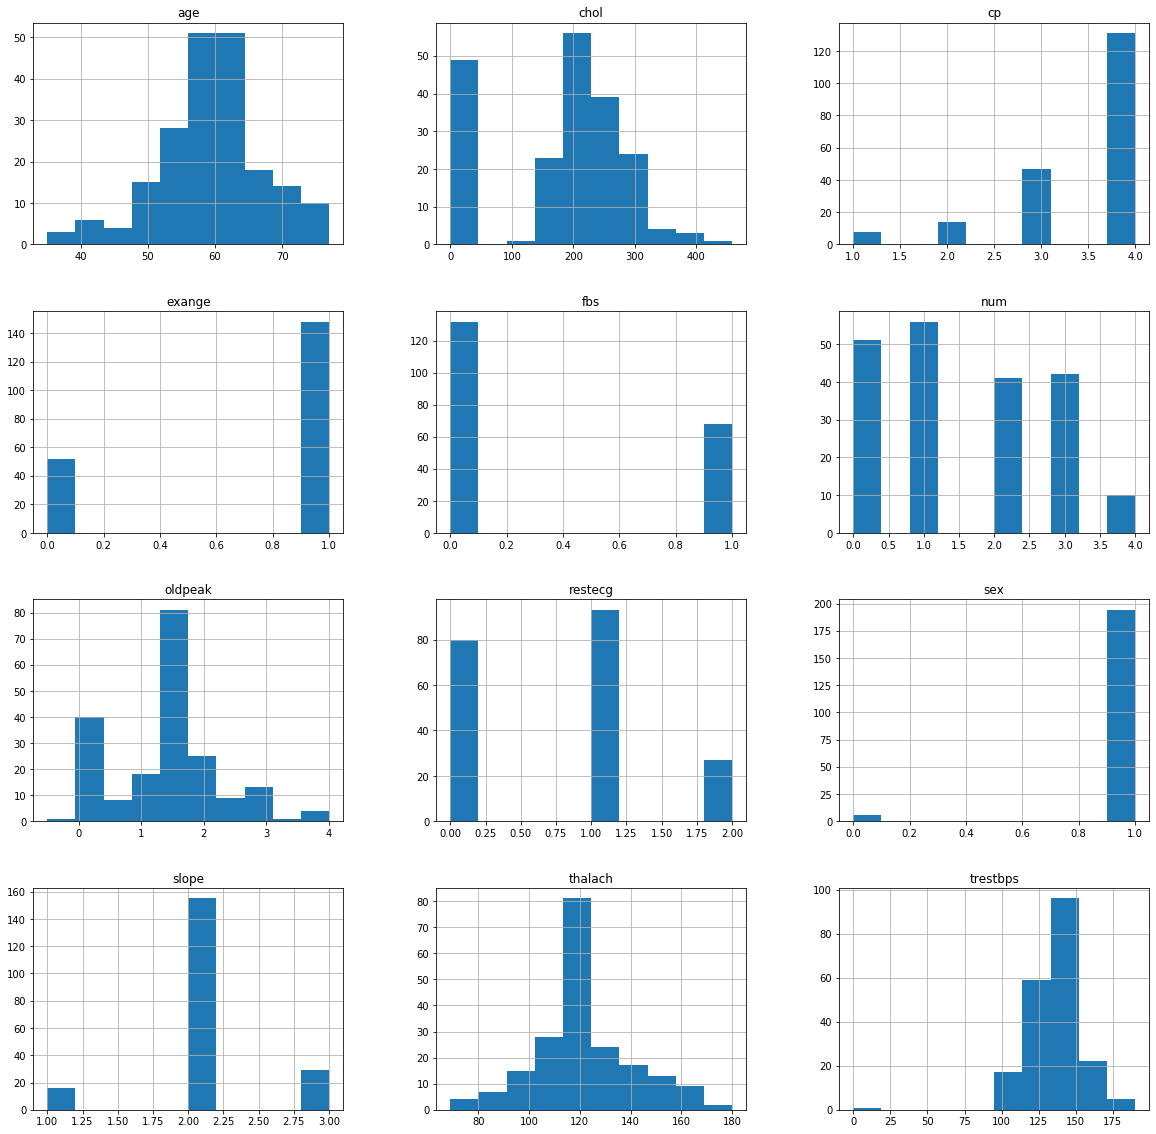

In [22]:
df.hist(figsize=(20,20))
plt.show()

Age distribution is normal with heart disease between ages 55 and above.

## Data Visualisation

According to the given data ,if the target(num) value is more than 0
then there is presence of heart disease.There are two risk factors
1.Non-modifiable factor
2.Modifiable factor

In [23]:
#to check the presence of value 0
df['num']=df.num.map({0:0,1:1,2:1,3:1,4:1})

1    149
0     51
Name: num, dtype: int64


Text(0.5, 1.0, 'Status')

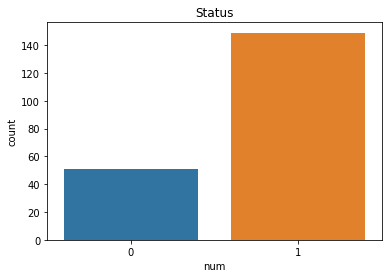

In [24]:
print(df['num'].value_counts())
sns.countplot(df['num'])
plt.title('Status')

(array([ 3.,  6.,  4., 15., 28., 51., 51., 18., 14., 10.]),
 array([35. , 39.2, 43.4, 47.6, 51.8, 56. , 60.2, 64.4, 68.6, 72.8, 77. ]),
 <a list of 10 Patch objects>)

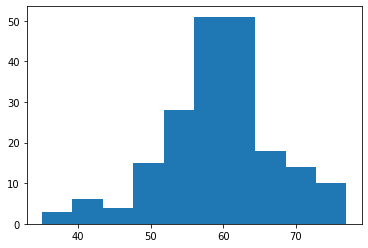

In [25]:
plt.hist(x='age',bins=10,data=df)

Finding: People between age grou of 55-65 have higher chances of getting heart 
    disease.

1    194
0      6
Name: sex, dtype: int64


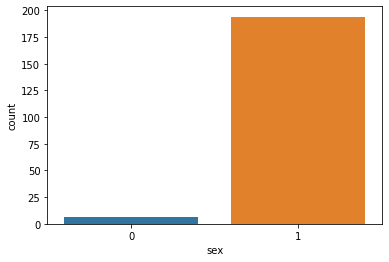

In [26]:
print(df['sex'].value_counts())
sns.countplot(df['sex'])

In the above data set number of males are higher than number of females.

Text(0.5, 1.0, 'num with respect to sex')

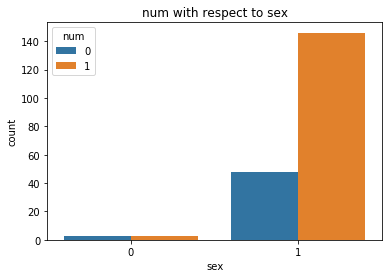

In [27]:
sns.countplot(x='sex',hue='num',data=df)
plt.title('num with respect to sex')

0.0    132
1.0     68
Name: fbs, dtype: int64


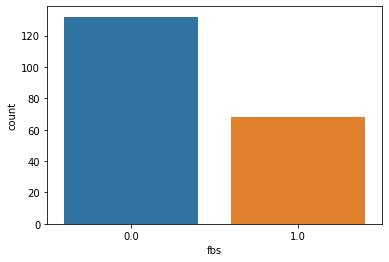

In [28]:
print(df['fbs'].value_counts())
sns.countplot(df['fbs'])

Fasting blood sugar has noticeable effect on heart.people with high
fbs have heart disease.

Text(0.5, 1.0, 'fbs/heartdisease')

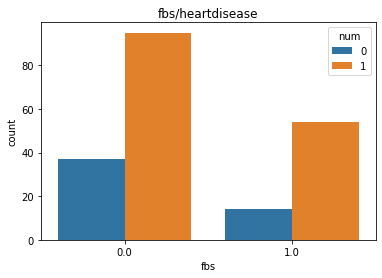

In [29]:
sns.countplot(x='fbs',hue='num',data=df)
plt.title('fbs/heartdisease')

4    131
3     47
2     14
1      8
Name: cp, dtype: int64


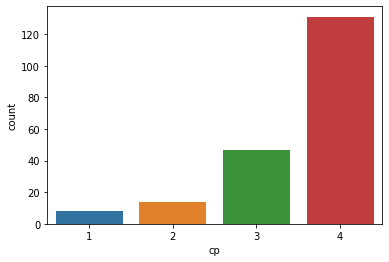

In [30]:
print(df['cp'].value_counts())
sns.countplot(df['cp'])

Text(0.5, 1.0, 'chest pain due to heart disease')

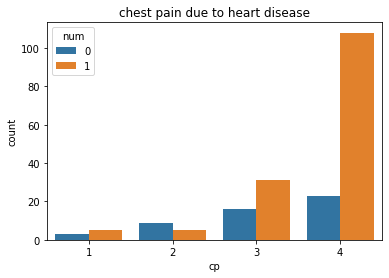

In [31]:
sns.countplot(x='cp',hue='num',data=df)
plt.title('chest pain due to heart disease')

1    93
0    80
2    27
Name: restecg, dtype: int64


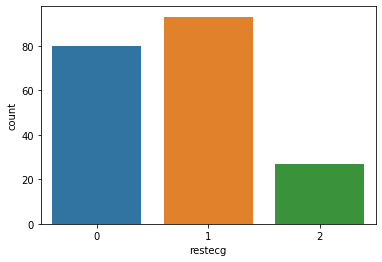

In [32]:
print(df['restecg'].value_counts())
sns.countplot(df['restecg'])

Text(0.5, 1.0, 'restecg vs num')

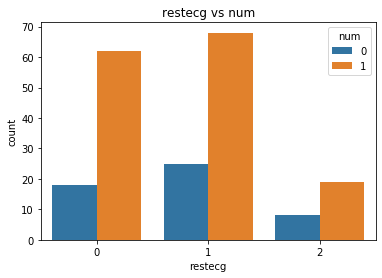

In [33]:
sns.countplot(x='restecg',hue='num',data=df)
plt.title('restecg vs num')

Resting Electrocardiographic results are the best way to find
diagnosis of the patient.

2.0    155
3.0     29
1.0     16
Name: slope, dtype: int64


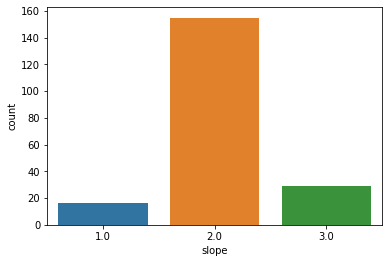

In [34]:
print(df['slope'].value_counts())
sns.countplot(df['slope'])

Text(0.5, 1.0, 'slope vs num')

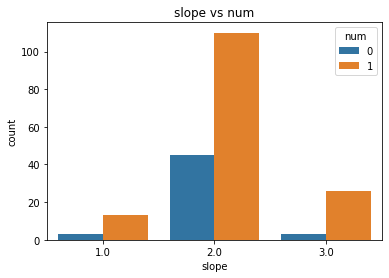

In [35]:
sns.countplot(x='slope',hue='num',data=df)
plt.title('slope vs num')

In [36]:
dis_yes=df[df['num']==1]

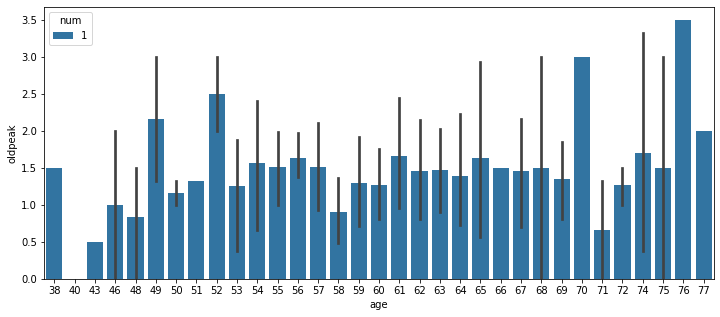

In [37]:
plt.figure(figsize=(12,5))
sns.barplot(x='age',y='oldpeak',hue='num',data=dis_yes)

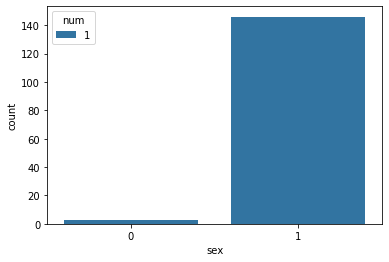

In [38]:
sns.countplot(x='sex',hue='num',data=dis_yes)

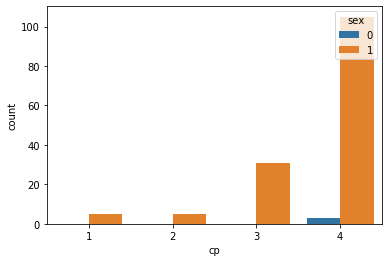

In [39]:
sns.countplot(x='cp',data=dis_yes,hue='sex')

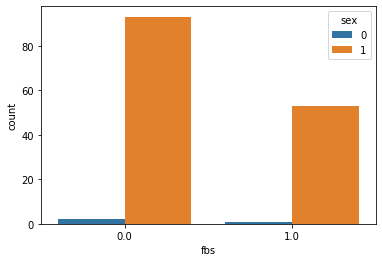

In [40]:
sns.countplot(x='fbs',data=dis_yes,hue='sex')

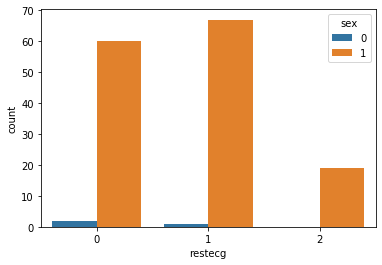

In [41]:
sns.countplot(x='restecg',data=dis_yes,hue='sex')

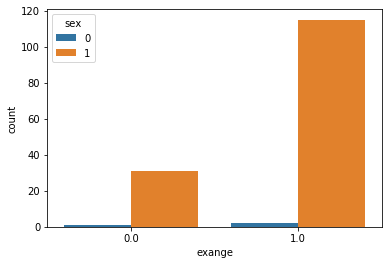

In [42]:
sns.countplot(x='exange',data=dis_yes,hue='sex')

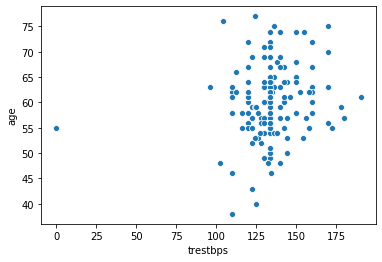

In [43]:
sns.scatterplot(x='trestbps',y='age',data=dis_yes)

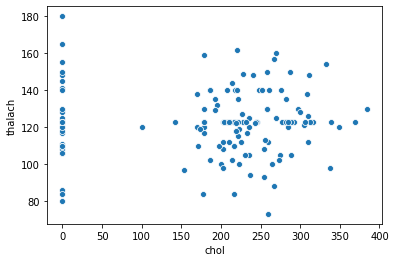

In [44]:
sns.scatterplot(x='chol',y='thalach',data=dis_yes)

Heart disease is found if heart rate is more than 80. Higher the 
cholestrol higher the risk of getting heart disease.

### Removing Skewness

In [45]:
#check for skewness

df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.680636
restecg     0.391463
thalach     0.148515
exange     -1.102593
oldpeak     0.423414
slope       0.210521
num        -1.132724
dtype: float64

In [46]:
import numpy as np
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])
        

In [47]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -2.168404
trestbps   -9.555472
chol       -1.118785
fbs         0.680636
restecg     0.391463
thalach     0.148515
exange     -1.102593
oldpeak     0.423414
slope       0.210521
num        -1.132724
dtype: float64

## Plotting outliers

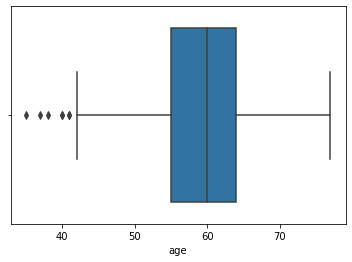

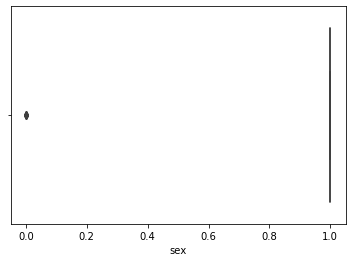

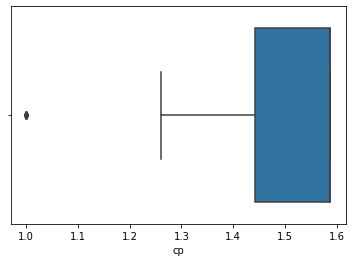

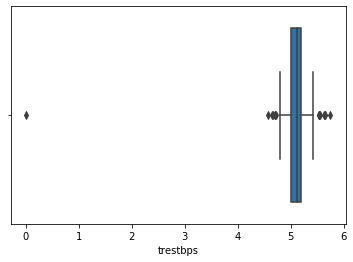

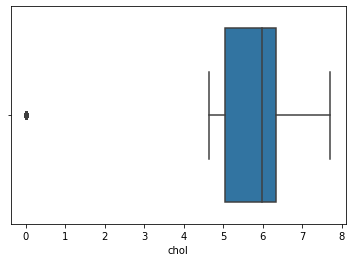

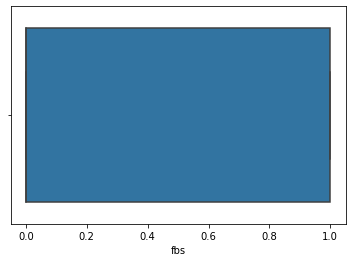

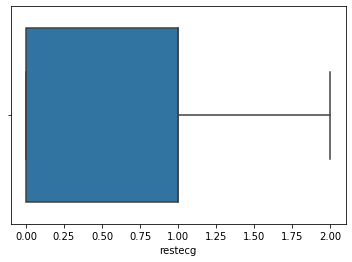

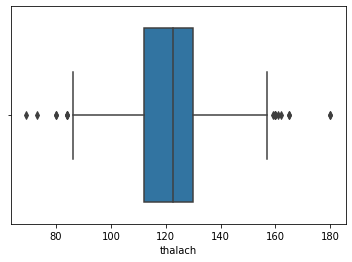

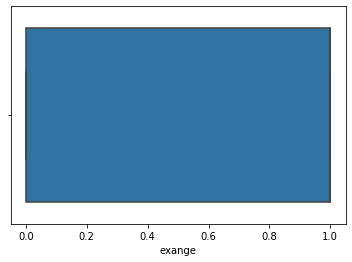

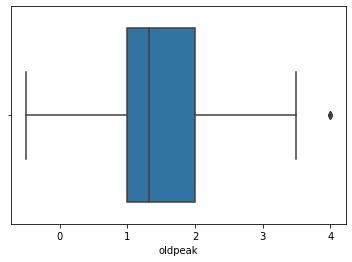

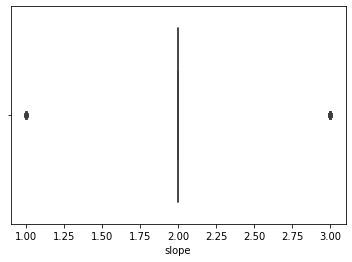

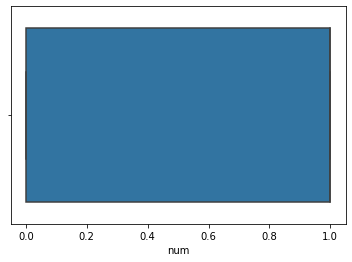

In [48]:
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

In [49]:
df1=df.copy()
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,oldpeak,slope,num
0,63,1.0,1.587401,5.192494,6.382504,0.0,1,112.0,1.0,3.0,2.0,1.0
1,44,1.0,1.587401,5.065797,5.934472,0.0,1,127.0,0.0,0.0,2.0,0.0
2,60,1.0,1.587401,5.091643,6.018462,0.0,1,140.0,1.0,1.5,3.0,1.0
3,55,1.0,1.587401,5.217103,6.109115,0.0,1,149.0,1.0,2.5,1.0,1.0
4,66,1.0,1.442250,4.791420,5.972093,1.0,2,99.0,1.0,1.3,2.0,0.0


In [50]:
df1.shape

(200, 12)

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(df1.describe()))
z

array([[2.4547973 , 2.64570583, 2.64568488, 2.64431837, 2.64418339,
        2.64570543, 2.64564416, 1.5022677 , 2.64570396, 2.64532557,
        2.64559602, 2.64570388],
       [0.19641826, 0.37438344, 0.37426919, 0.35782066, 0.3774776 ,
        0.37889908, 0.37854204, 0.06278707, 0.37579091, 0.3797168 ,
        0.37376054, 0.37571988],
       [1.16790174, 0.38650727, 0.39505047, 0.42988434, 0.40784806,
        0.37685555, 0.37932433, 1.87556552, 0.380344  , 0.38554946,
        0.39807516, 0.38039096],
       [0.65540937, 0.38910226, 0.38198093, 0.43621594, 0.44933314,
        0.38404967, 0.38969692, 0.94024516, 0.38701196, 0.40744038,
        0.39000635, 0.38701677],
       [0.27841462, 0.37392822, 0.37525237, 0.35904896, 0.37129186,
        0.38404967, 0.38969692, 0.1385043 , 0.38701196, 0.38460173,
        0.37475206, 0.38701677],
       [0.18416593, 0.37392822, 0.37304397, 0.35744325, 0.35681497,
        0.38404967, 0.37452022, 0.06278707, 0.37184838, 0.3797168 ,
        0.37475206,

In [56]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


No outliers detected.

## Machine Learning Algorithms

In [57]:
#pipeline
#splitting x and y variables

x=df1.drop(columns=['num'])
y=df1['num']

In [58]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,oldpeak,slope
0,63,1.0,1.587401,5.192494,6.382504,0.0,1,112.000000,1.0,3.000000,2.0
1,44,1.0,1.587401,5.065797,5.934472,0.0,1,127.000000,0.0,0.000000,2.0
2,60,1.0,1.587401,5.091643,6.018462,0.0,1,140.000000,1.0,1.500000,3.0
3,55,1.0,1.587401,5.217103,6.109115,0.0,1,149.000000,1.0,2.500000,1.0
4,66,1.0,1.442250,4.791420,5.972093,1.0,2,99.000000,1.0,1.300000,2.0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0.0,1.587401,5.026526,6.931301,1.0,1,154.000000,0.0,0.000000,2.0
196,62,1.0,1.000000,5.114223,5.180101,0.0,1,122.795918,1.0,1.320833,2.0
197,55,1.0,1.587401,4.959676,6.064127,1.0,1,100.000000,0.0,0.000000,2.0
198,58,1.0,1.587401,5.114223,7.274786,1.0,2,122.795918,1.0,1.320833,2.0


In [59]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
195    1.0
196    0.0
197    1.0
198    0.0
199    1.0
Name: num, Length: 200, dtype: float64

In [60]:
#Scaling data using Standard Scaler

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [63]:
print(x_train.shape,x_test.shape)

(160, 11) (40, 11)


In [64]:
print(y_train.shape,y_test.shape)

(160,) (40,)


In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [66]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

In [67]:
#KNN

knn=KNeighborsClassifier()
neighbors={'n_neighbors':range(1,30)}
bknn=GridSearchCV(knn,neighbors)
bknn.fit(x_train,y_train)
bknn.best_params_

{'n_neighbors': 10}

In [68]:
KNN=KNeighborsClassifier(n_neighbors=10)

In [70]:
#SVC

svc=SVC()
svc_parameters={'kernel':['linear','sigmoid','poly','rbf'],'C':[1,10]}
bsvc=GridSearchCV(svc,svc_parameters)
bsvc.fit(x_train,y_train)
bsvc.best_params_

{'C': 10, 'kernel': 'poly'}

In [71]:
SV=SVC(kernel='poly',C=10)

In [74]:
#Decision Tree Classifier

dtc=DecisionTreeClassifier(random_state=42)
criterion={'criterion':['gini','entropy']}
bdtc=GridSearchCV(dtc,criterion)
bdtc.fit(x_train,y_train)
bdtc.best_params_

{'criterion': 'entropy'}

In [75]:
DTC=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [76]:
#Random Forest Classifier

rf=RandomForestClassifier(random_state=42)
parameters={'n_estimators':range(100,200,300)}
brf=GridSearchCV(rf,parameters)
brf.fit(x_train,y_train)
brf.best_params_

{'n_estimators': 100}

In [77]:
RFC=RandomForestClassifier(n_estimators=100,random_state=42)

In [78]:
#Gradient Boosting Classifier

GBC=GradientBoostingClassifier(n_estimators=250)

In [79]:
#ExtraTreesClassifier

ETC=ExtraTreesClassifier(n_estimators=250)

In [80]:
#AdaBoostClassifier

ABC=AdaBoostClassifier(n_estimators=50)


In [81]:
#Bagging Classifier

BC=BaggingClassifier(n_estimators=250)

In [83]:
KNN=KNeighborsClassifier(n_neighbors=10)
SV=SVC(kernel='poly',C=10)
LR=LogisticRegression()
DTC=DecisionTreeClassifier(criterion='entropy',random_state=42)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=42)
GBC=GradientBoostingClassifier(n_estimators=250)
ETC=ExtraTreesClassifier(n_estimators=250)
ABC=AdaBoostClassifier(n_estimators=50)
BC=BaggingClassifier(n_estimators=250)

In [84]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisonTreeClassifier',DTC))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))
models.append(('BaggingClassifier',BC))

In [86]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc


******************** KNeighborsClassifier *********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy_score= 0.8


Cross_Val_Score= 0.77


roc_auc_score= 0.6666666666666667


classification_report
               precision    recall  f1-score   support

         0.0       0.67      0.40      0.50        10
         1.0       0.82      0.93      0.87        30

    accuracy                           0.80        40
   macro avg       0.75      0.67      0.69        40
weighted avg       0.78      0.80      0.78        40



[[ 4  6]
 [ 2 28]]





******************** SVC *********************


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, ve

Cross_Val_Score= 0.74


roc_auc_score= 0.7166666666666667


classification_report
               precision    recall  f1-score   support

         0.0       0.71      0.50      0.59        10
         1.0       0.85      0.93      0.89        30

    accuracy                           0.82        40
   macro avg       0.78      0.72      0.74        40
weighted avg       0.81      0.82      0.81        40



[[ 5  5]
 [ 2 28]]







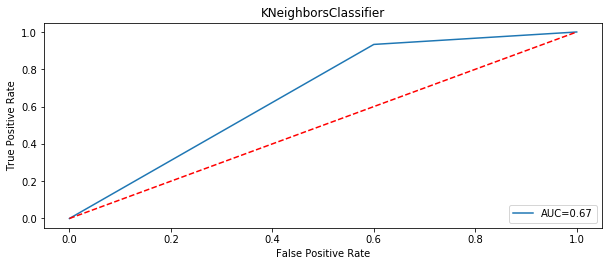

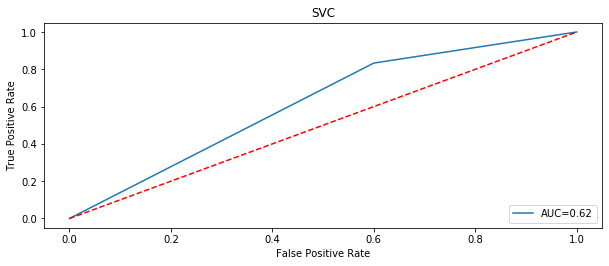

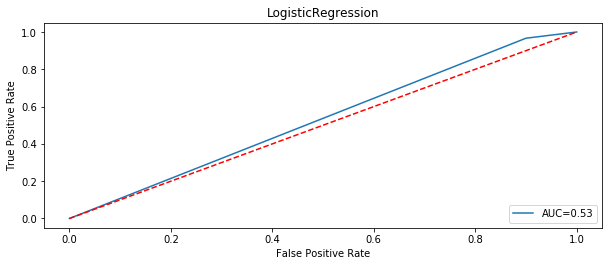

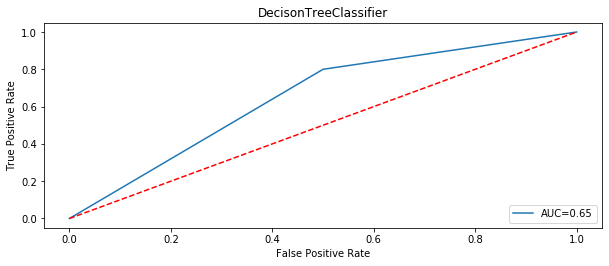

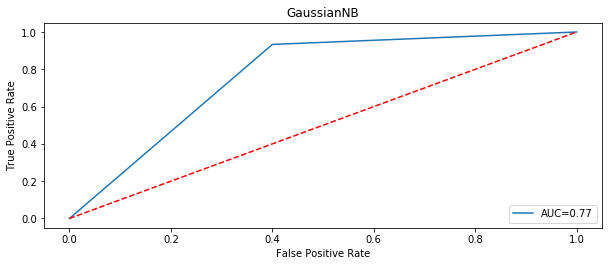

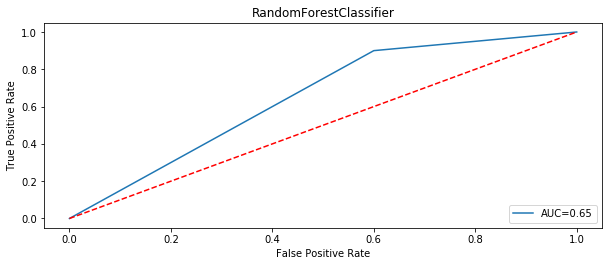

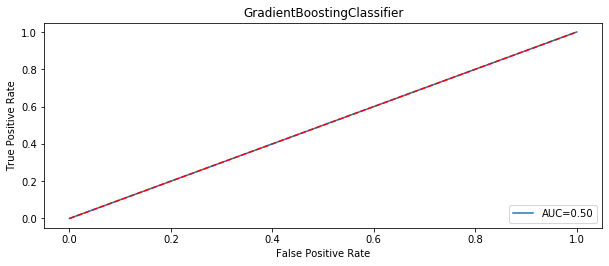

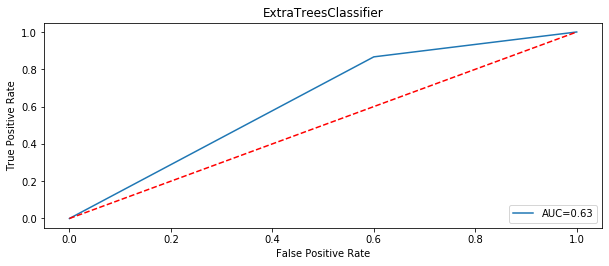

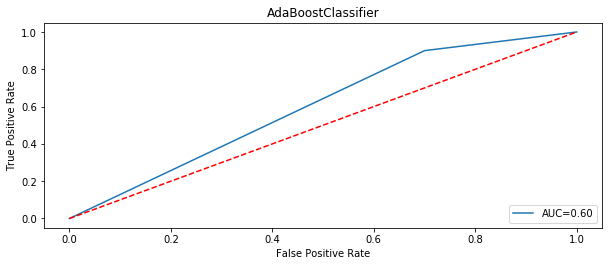

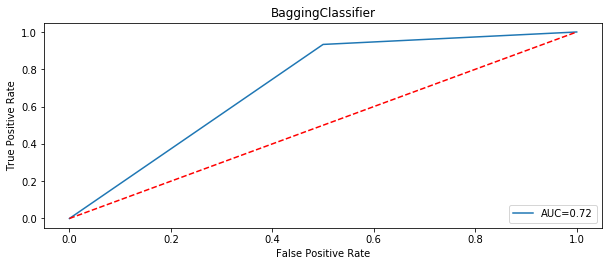

In [88]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('********************',name,'*********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    
    print('Cross_Val_Score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')
         
                
        

In [90]:
final=pd.DataFrame({'Model':Model,'Accuracy_score':score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
final

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,80.0,77.0,66.666667
1,SVC,72.5,73.0,61.666667
2,LogisticRegression,75.0,74.0,53.333333
3,DecisonTreeClassifier,72.5,69.0,65.000000
4,GaussianNB,85.0,76.5,76.666667
5,RandomForestClassifier,77.5,76.0,65.000000
6,GradientBoostingClassifier,65.0,71.5,50.000000
7,ExtraTreesClassifier,75.0,78.0,63.333333
8,AdaBoostClassifier,75.0,69.0,60.000000
9,BaggingClassifier,82.5,74.0,71.666667


Highest Accuracy is achieved by GNB with 85% accuracy.

In [91]:
#saving the model

import joblib
from joblib import dump
joblib.dump(GNB,'heart_disease.pkl')

['heart_disease.pkl']